# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=12)
from pertussis import *
logger.setLevel(logging.INFO)
plt.rcParams['figure.figsize'] = (16,9)

# Multiple Chain
## Load Models

In [48]:
save_vers = '1117-rho-60-multi-sigma'
[save_mcmc(mc, './chains/' + save_vers) for mc in mcmcs[:] ]
# [save_mcmc(mc, './') for mc in mcmcs[1:] ]

['mcmc_v2_0', 'mcmc_v2_1', 'mcmc_v2_2', 'mcmc_v2_3']

./
mcmc_v2_0 - MLE: -20.30 at 9281 (of 28880)with values: 
 [ 1.674118926644  0.000657573809  0.000336232023  0.000057298661]
mcmc_v2_1 - MLE: -20.34 at 1929 (of 5351)with values: 
 [ 1.633726479946  0.00064455547   0.000344729928  0.000058365731]
mcmc_v2_2 - MLE: -20.37 at 1160 (of 5101)with values: 
 [ 1.540892113818  0.000655643265  0.000338175548  0.000056929909]
mcmc_v2_3 - MLE: -20.43 at 7465 (of 10601)with values: 
 [ 1.529182840333  0.000629044304  0.000342810574  0.000058297017]
[ 2173.977547141532  2525.057696646616  2087.720056694247  2538.117123067266]


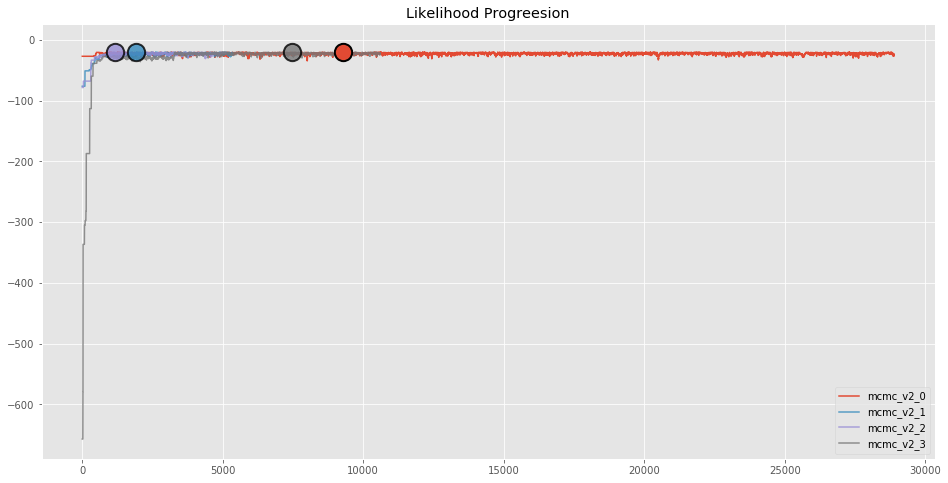

In [47]:
vers = 'chains/1106-rho-60-multi-sigma'
vers = ''
print ('./' + vers)
# mcmcs = [load_mcmc('./' + vers + 'mcmc_{}.pkl'.format(i)) for i in [0,1,2,3]]
mcmcs = [load_mcmc('./' + vers + 'mcmc_v2_{}.pkl'.format(i)) for i in [0,1,2,3]]
for mc in mcmcs:
    chain_tally(mc, 0)
fig, ax = likelihood_progression_multi(mcmcs)
print (ess(mcmcs[0]))

In [215]:
# lldiff = mcmcs[0]['ll'][-5000:,1] - mcmcs[1]['ll'][-5000:,1]
# fig, ax = plt.subplots()
# print (ax.get_xlim())
# density = kde(lldiff)
# xs = np.linspace(lldiff.min(), lldiff.max(), 100)
# ax.plot(xs, density(xs))
# ax.set_title("Distribution: $LL_{{chain0}} - LL_{{chain1}}$")

## Chains and Distributions

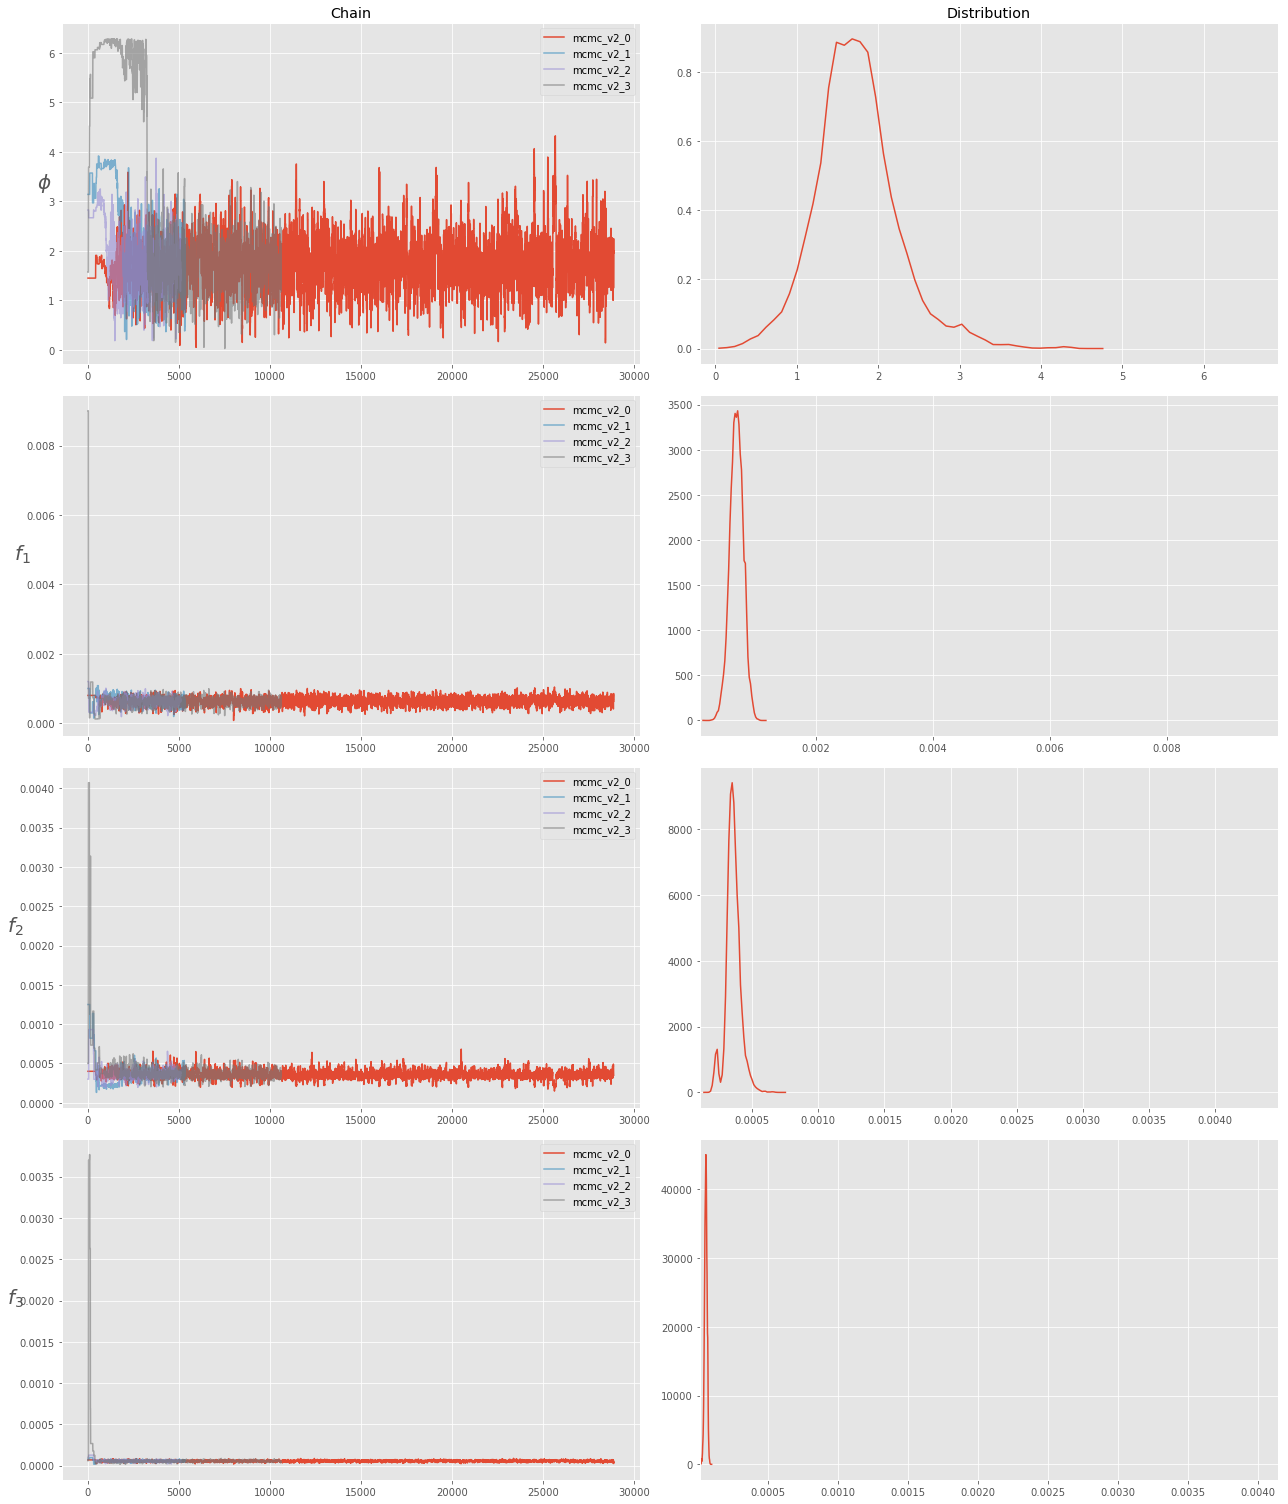

In [49]:
fig, axs = plot_chains(mcmcs[0], multi_chain = True, dists = False)
for mc in mcmcs[1:]:
    plot_chains(mc, fig = fig, multi_chain = True, dists = False)

# Single Chain

In [50]:
# Choose best model
active_max = max([mc['max_likelihood'] for mc in mcmcs if mc['active']])
mcmc = [mc for mc in mcmcs if mc['max_likelihood']==active_max][0]
print (mcmc['name'], mcmc['max_likelihood'])

mcmc_v2_0 -20.2982052855


In [51]:
chain_tally(mcmc, 10000)
save_mcmc(mcmc, './chains/1117-rho-60-multi-sigma-best-')

'mcmc_v2_0'

## Load Model

mcmc_v2_0: 28880
['phi', 'f1', 'f2', 'f3']
MLE: -20.31 at 18074 with values: 
 [ 1.652493071983  0.000667445624  0.000336668712  0.000057846125]


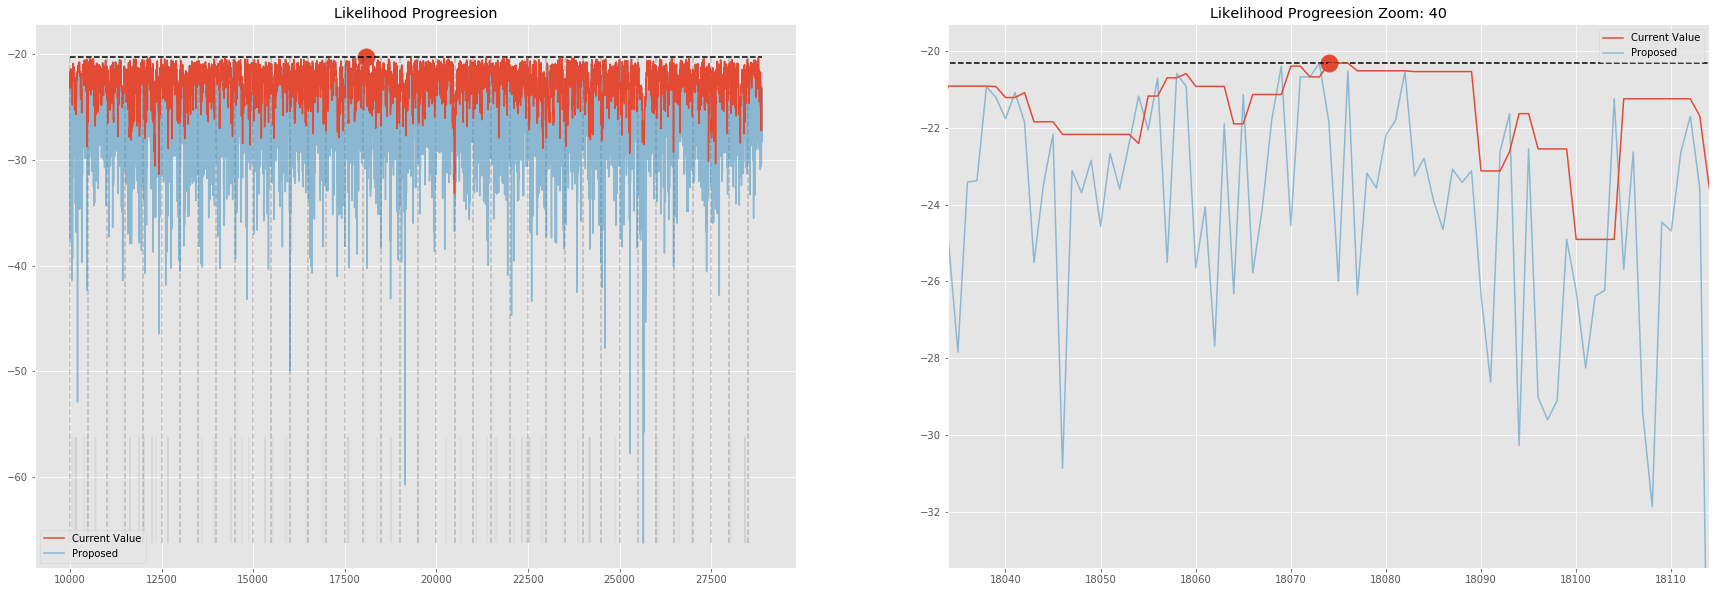

In [52]:
# Load
# mcmc = load_mcmc('./chains/mcmc_0.pkl')
# mcmc = load_mcmc('./mcmc_0.pkl')

print ('{}: {}'.format(mcmc['name'], len(mcmc['chain'])))
names = [mcmc['names'][i] for i in mcmc['active_params']]
print(names)

# Distributions
dists = mcmc['dists']
# Times
r_start = mcmc['start']
r_end = mcmc['end']
step = 1 / N

# Data
data_M, months = mcmc['datax'], mcmc['datay']
state_0 = mcmc['state_0']

# Results
ll = chain_ll(mcmc)

#PLOT
fig, axs = plt.subplots(1,2,figsize=(30,10))
likelihood_progression(mcmc, ax=axs[0])
likelihood_progression(mcmc, zoom=40, ax=axs[1])
plt.show()

## Summary
difference between LL for following runs

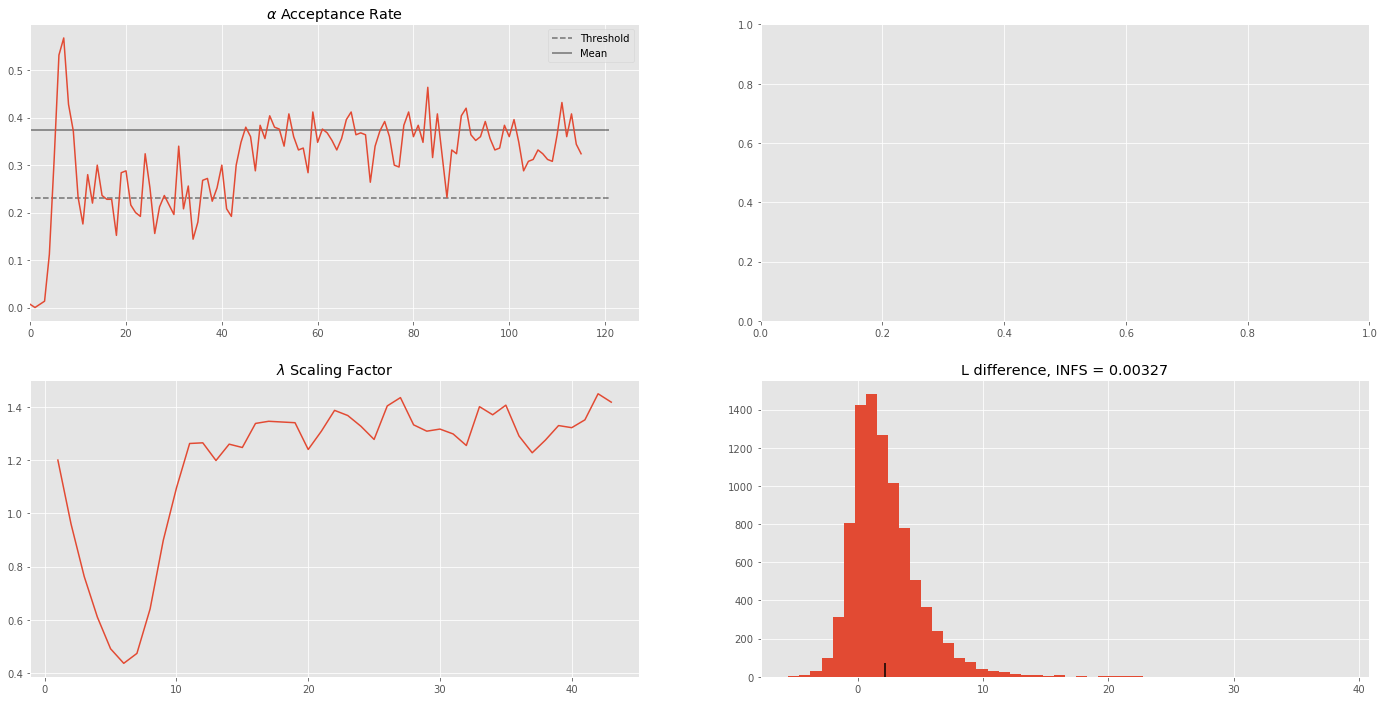

In [53]:
chain_summary(mcmc)

## Traces
### Chains

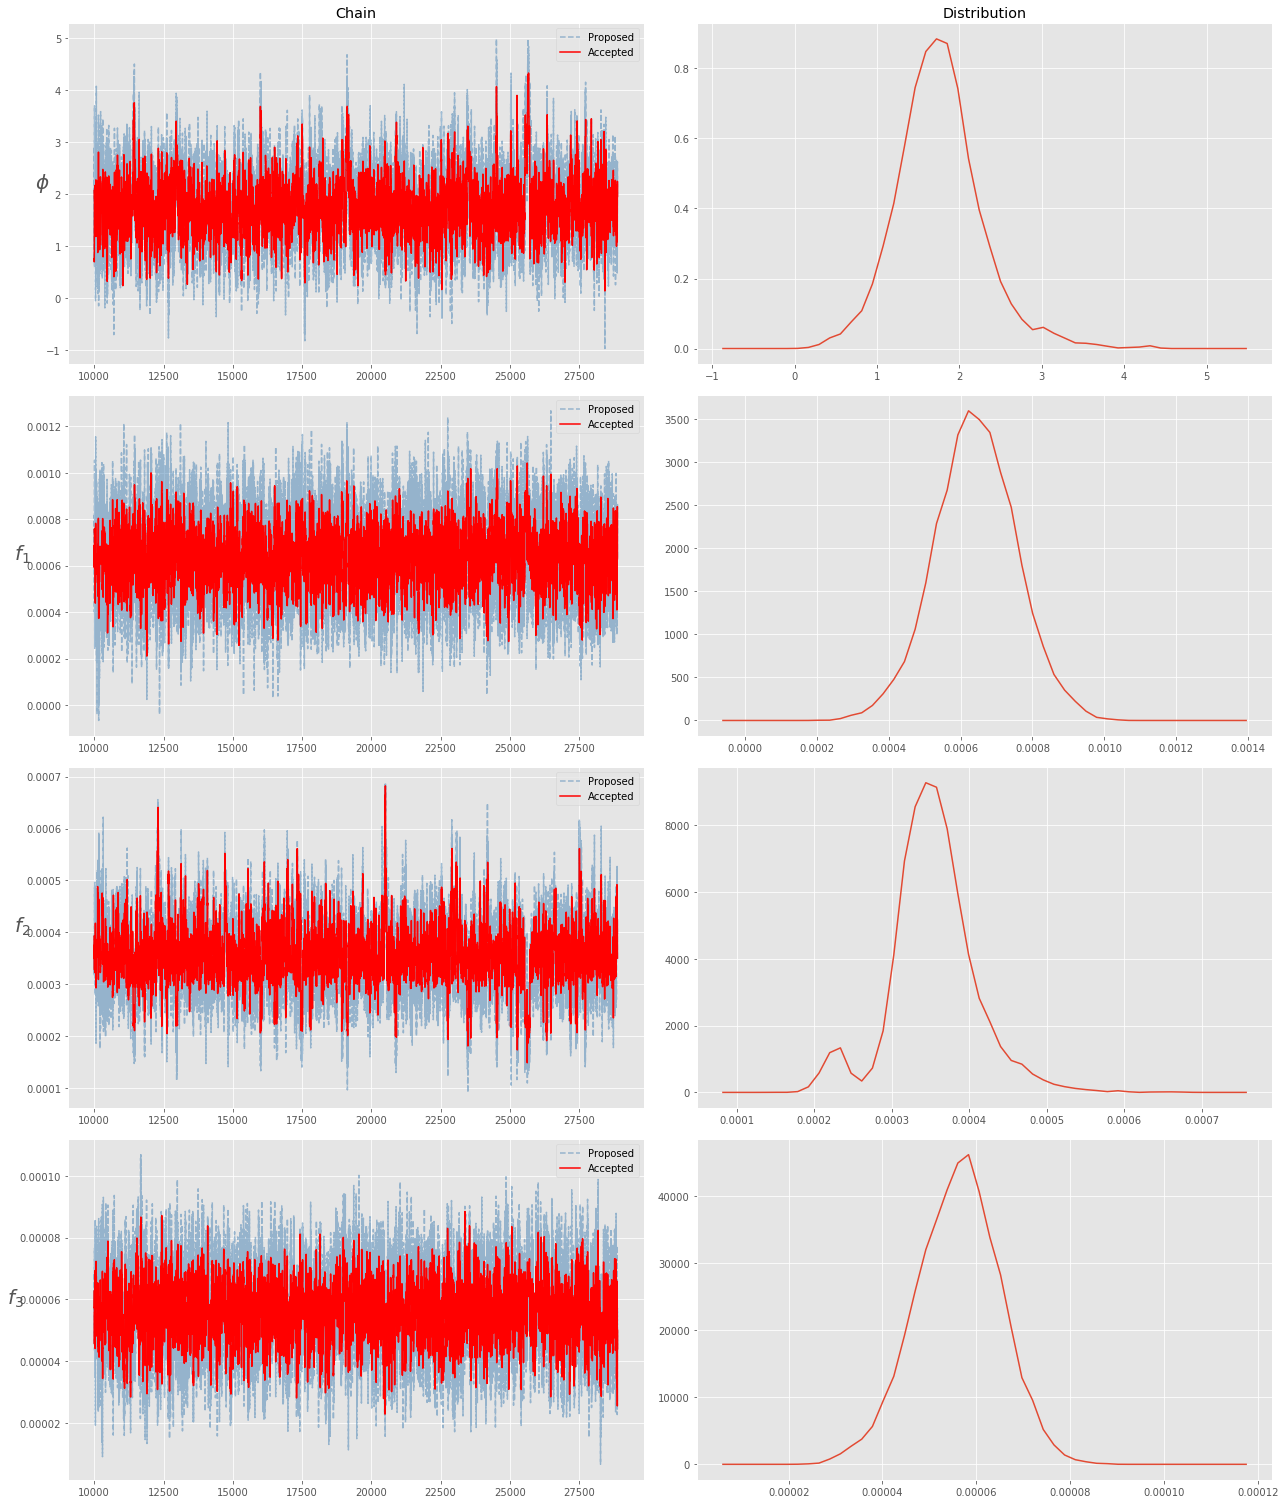

In [54]:
plot_chains(mcmc)
plt.show()

## PPT

### Chains

In [34]:
[['$\Omega$','$\phi$',r'$\rho$','$f_1$','$f_2$','$f_3$'][i] for i in mcmc['active_params']]

['$\\phi$', '$f_1$', '$f_2$', '$f_3$']

In [217]:
mcmc['cov']

array([[ 0.050975744066,  0.000004778498, -0.000002210104, -0.000000171552],
       [ 0.000004778498,  0.000000009553, -0.000000001695, -0.000000000187],
       [-0.000002210104, -0.000000001695,  0.000000000624,  0.000000000034],
       [-0.000000171552, -0.000000000187,  0.000000000034,  0.000000000034]])

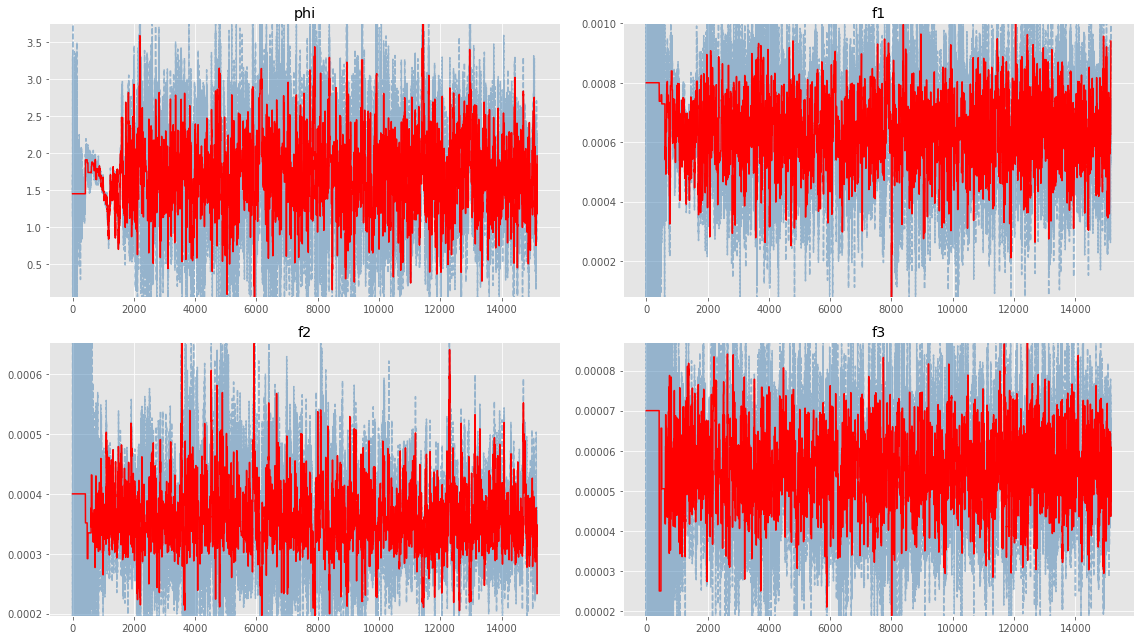

In [36]:
fig, axs = plt.subplots(2,2, figsize=(16,9))
axs = np.concatenate(axs)
tally = 0#-12500
mcmc = mcmc
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
# names = ["omega", "phi", "rho", "f1"]#,"f2","f3","e"]
for i, name in enumerate(names):
    ch = chain[:,i]
#     print (ch)
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].plot(guesses[:,i], color='steelblue', ls='--', alpha=0.5)
    axs[i].plot(chain[:,i], color='red')#, label = 'chain {}'.format(j))

    axs[i].set_title(name)
    axs[i].set_ylim(a,b)
#     density = kde(chain[:,i])
#     xs = np.linspace(a,b,50)
#     axs[i,1].plot(xs,density(xs))
# ax = axs[-1]
# ax.imshow(cov_mat, cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
# ax.set_yticks([])
# ax.set_xticks([])
plt.tight_layout()
plt.show()

#### Distributions


[0 1 2 3]


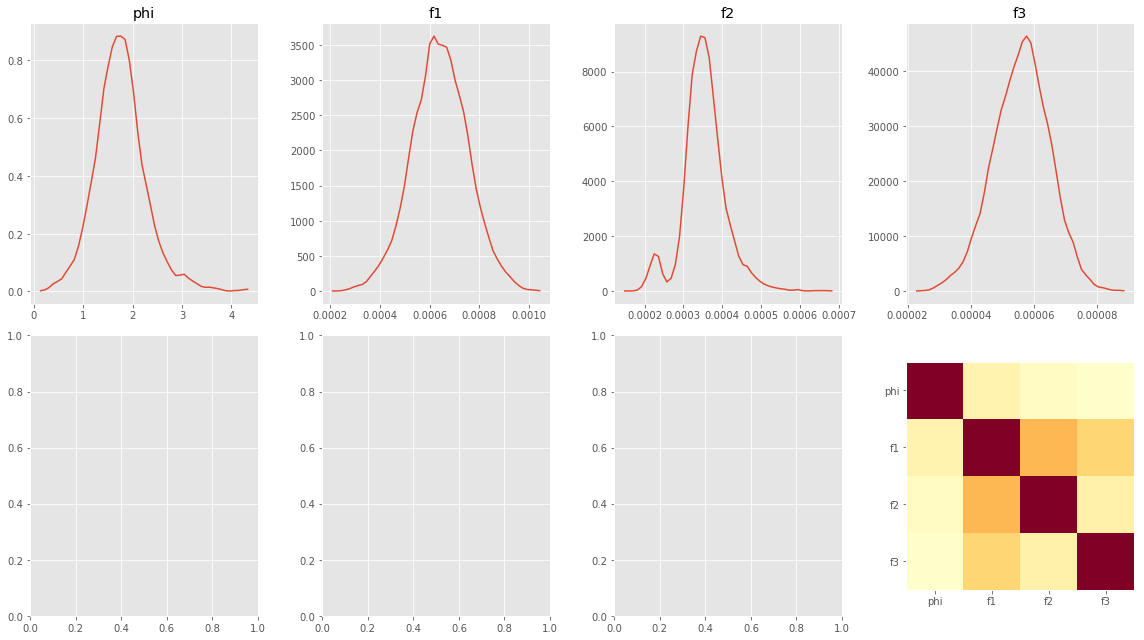

In [55]:
tally = mcmc['tally']
chain = mcmc['chain'][tally:,:]
guesses = mcmc['guesses'][tally:,:]
cov_mat = np.corrcoef(chain[-1000:,:].T,)
fig, axs = plt.subplots(2,4, figsize=(16,9))
axs = np.concatenate(axs)



for i, name in enumerate(names):
#     if i==2: continue
    ch = chain[:,i]
    a,b = dists[i].args
    a, b = a,a+b
    a,b = min(ch), max(ch)
    axs[i].set_title(name)
    
    density = kde(chain[:,i])
    xs = np.linspace(a,b,50)
    axs[i].plot(xs,density(xs))
ax = axs[-1]
ax.imshow(np.abs(cov_mat), cmap='YlOrRd')
# ax.imshow(cov_mat, cmap='seismic')
ax.set_yticks(np.arange(4))
ax.set_xticks(np.arange(4))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
ax.grid(False)
print (ax.get_xticks())
plt.tight_layout()
plt.show()

In [56]:
cov_mat

array([[ 1.            , -0.11605531191 , -0.063501760602, -0.035261799575],
       [-0.11605531191 ,  1.            , -0.377450980749, -0.287279881055],
       [-0.063501760602, -0.377450980749,  1.            , -0.128681390376],
       [-0.035261799575, -0.287279881055, -0.128681390376,  1.            ]])

# PAPER

## A
Image of Model compartments

In [57]:
# Model

## B

-20.3098708891 18074
[ 1.652493071983  0.000667445624  0.000336668712  0.000057846125]
[ 1.652493071983  0.000667445624  0.000336668712  0.000057846125]
[  3.9805           1.652493071983  60.               0.000667445624   0.000336668712   0.000057846125]
[ 1.652493071983  0.000667445624  0.000336668712  0.000057846125] -20.3098708891


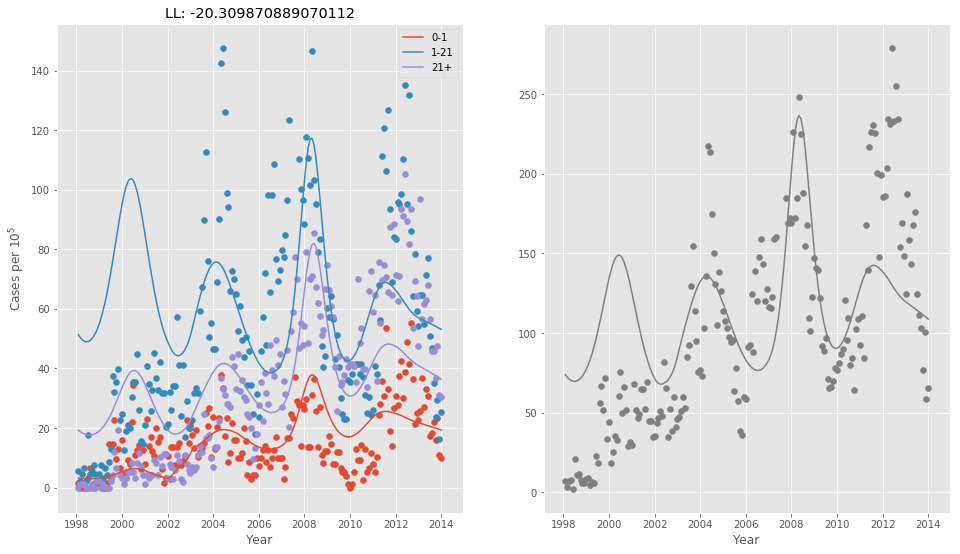

In [58]:
mle, mle_place, min_le = mle_values(mcmc, True)
print (mle, mle_place)
best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
g = mcmc['initial_guess']
g[mcmc['active_params']] = best_vals
print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
# zb, _ = run_model(mcmc['state_0'],mcmc['start'],mcmc['end'],*g)
zb = mcmc['y_hat_M'][mle_place-1,:,:]
print ((bvals), log_liklihood(zb, mcmc['datax'], mcmc['sigma']))
###### Draw Figure 4####
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(mcmc['datay'], zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(mcmc['datay'][mcmc['datax'][i,:]<150], mcmc['datax'][i, :][mcmc['datax'][i,:]<150])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datax'], mcmc['sigma'])))
ax = axs[1]
ax.plot(mcmc['datay'], zb.sum(axis=0), color='grey')
# ax.plot(mcmc['datay'], zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(mcmc['datay'][sl150], mcmc['datax'].sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

## C Cloud

In [59]:
plot_data = mcmc['datax'].copy()
plot_data[mcmc['datax'] > 150] = np.nan
thinnig = int(len(mcmc['chain'] - mcmc['tally']) // (ess(mcmc).mean()))
sampled = mcmc['y_hat_M'][mcmc['tally']::thinnig,:,:].copy()
print (ess(mcmc))
print (len(sampled))


[ 1431.51012568492   1795.833585682093  1326.091008604588  1742.728171317367]
1049


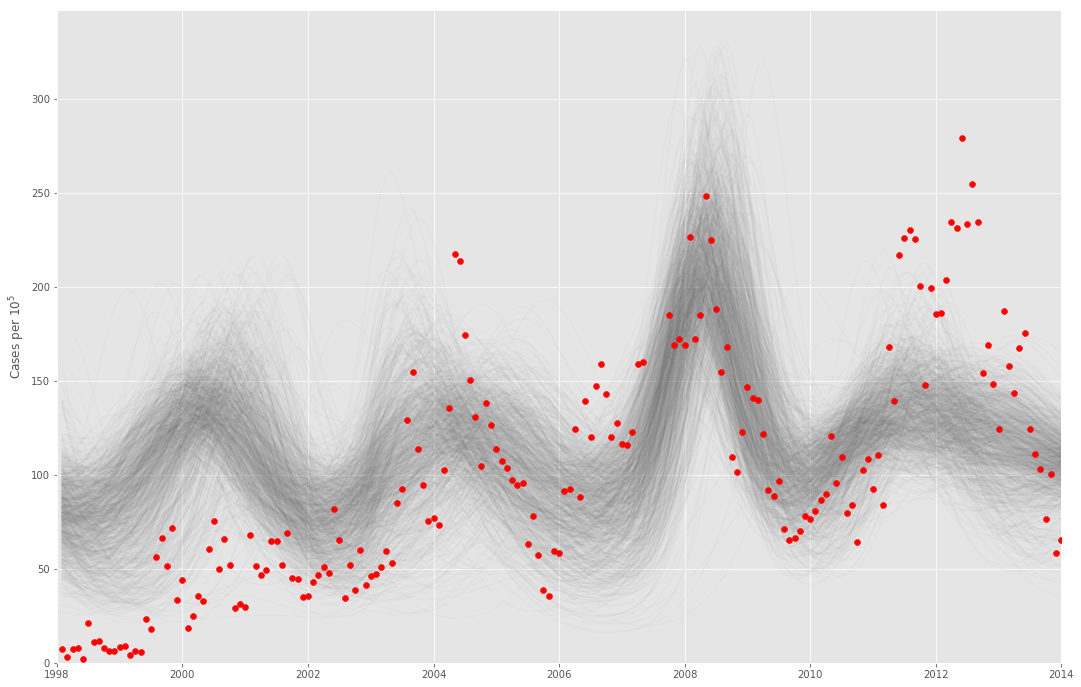

In [60]:
fig, axs = plt.subplots(1, figsize=(18, 12))
# from_place = mle_place
# print (from_place)
for j in sampled:
    curr_model = j
    ax = axs
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.03)
ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

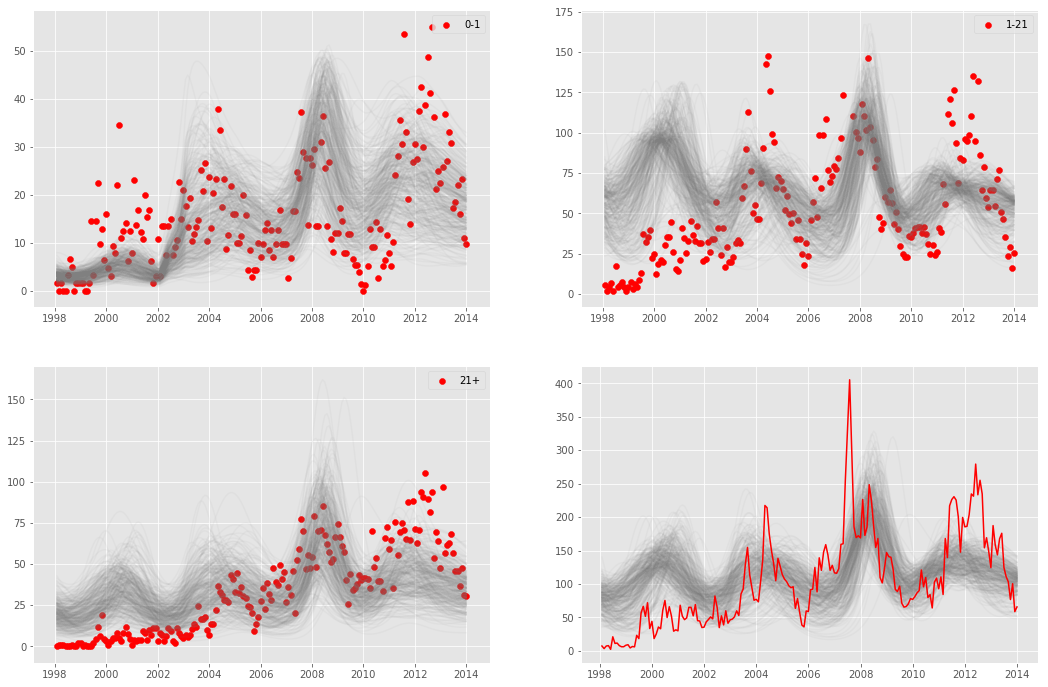

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
# from_place = mle_place
for j in sampled[::3]:
    curr_model = j#mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.plot(mcmc['datay'], curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.05)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.scatter(mcmc['datay'], plot_data[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.plot(mcmc['datay'], mcmc['datax'].sum(axis=0), c='red')
plt.show()

## D Bars

In [41]:
# for j in np.arange(-5000,-1,100):
med = np.median(mcmc['y_hat_M'][-2000:,:,:].sum(axis=2), axis=0)
N = med.sum()
med /= N
med


qs = mcmc['y_hat_M'][-5000:,:,:].sum(axis=2)
qs = (mquantiles(qs, axis=0,prob=[0.05,0.95])/N).data
print(med)
print(qs)

[ 0.128196143157  0.568269179604  0.303534677239]
[[ 0.065330281945  0.442690103363  0.165344744577]
 [ 0.199960280172  0.656363982821  0.447322294861]]


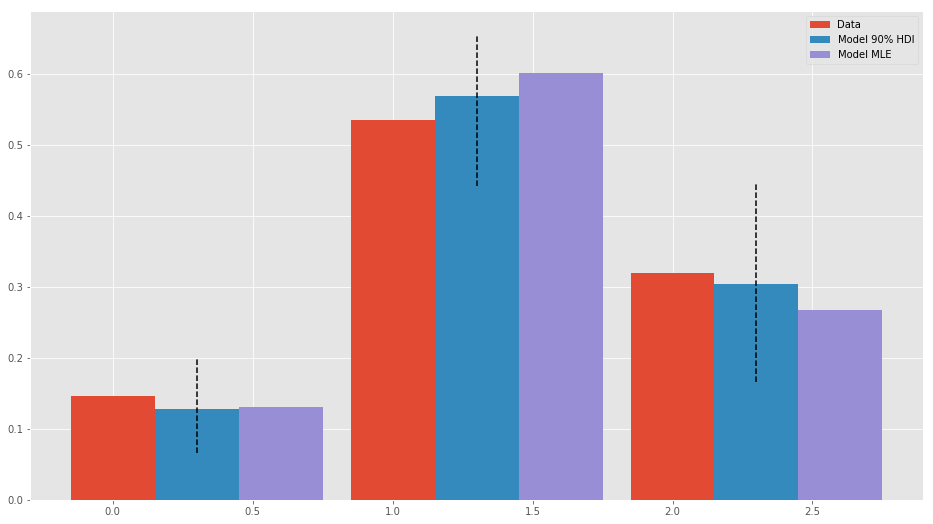

In [62]:

data_age_dist = mcmc['datax'].sum(axis=1)
data_age_dist /= data_age_dist.sum()

y_age_dist = mcmc['y_hat_M'][mle_place,:,:].sum(axis=1)
y_age_dist /= y_age_dist.sum()

x = np.arange(len(data_age_dist))
fig, ax = plt.subplots(figsize=(16,9))
# https://matplotlib.org/2.0.0/examples/api/barchart_demo.html
width = 0.3
ax.bar(x,data_age_dist, width, label="Data")
ax.bar(x+width, med, width, label="Model 90% HDI")
ax.vlines(x+width, qs[0,:], qs[1,:],linestyles='--')
ax.bar(x+2*width, y_age_dist, width, label="Model MLE")

ax.legend()

## Likelihood Cloud

In [21]:
plot_data = mcmc['datax'].copy()
plot_data[mcmc['datax'] > 150] = np.nan

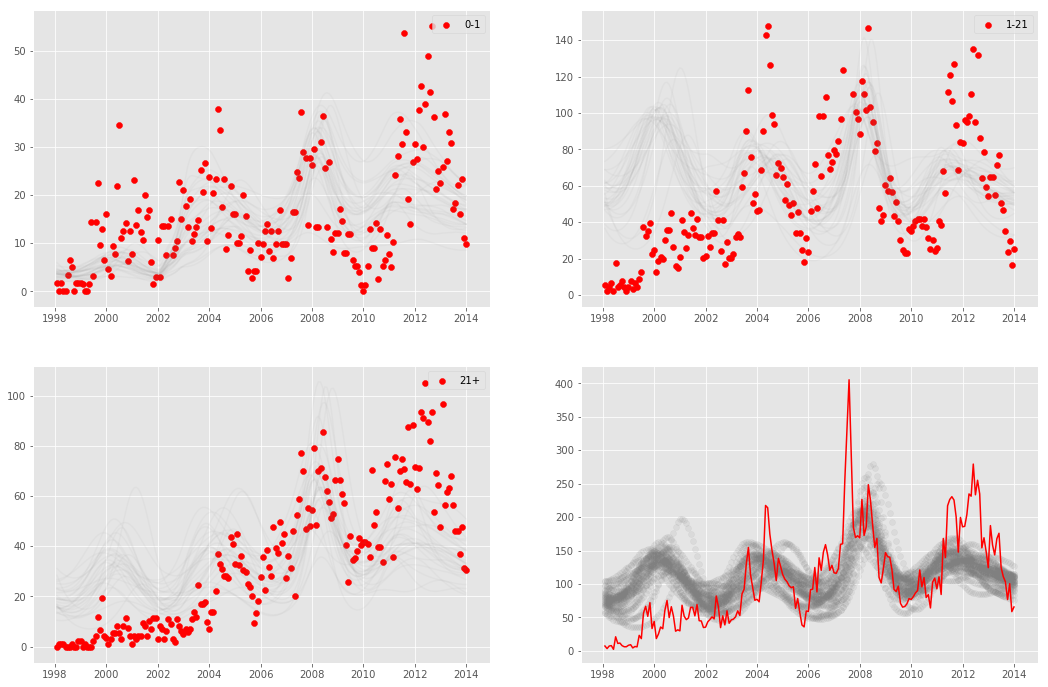

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = np.hstack(axs)
labels = ['0-1', '1-21', '21+']
from_place = mle_place
for j in np.arange(-2000, 0, 20):
    chain_place = j #from_place + j
    if mcmc['accepted'][chain_place] == 0: continue
    curr_model = mcmc['y_hat_M'][j,:,:]
    for i, l in enumerate(labels):
        ax = axs[i]
        if i >=3:
            continue
        ax.plot(mcmc['datay'], curr_model[i, :], color='grey', alpha=0.051)
        

    ax = axs[3]
    ax.scatter(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.10511)

# ax.set_ylim

for i, l in enumerate(labels):
    ax = axs[i]
    ax.scatter(mcmc['datay'], plot_data[i, :], color='red', label=l)
    ax.legend()
ax = axs[3]
ax.plot(mcmc['datay'], mcmc['datax'].sum(axis=0), c='red')
plt.show()

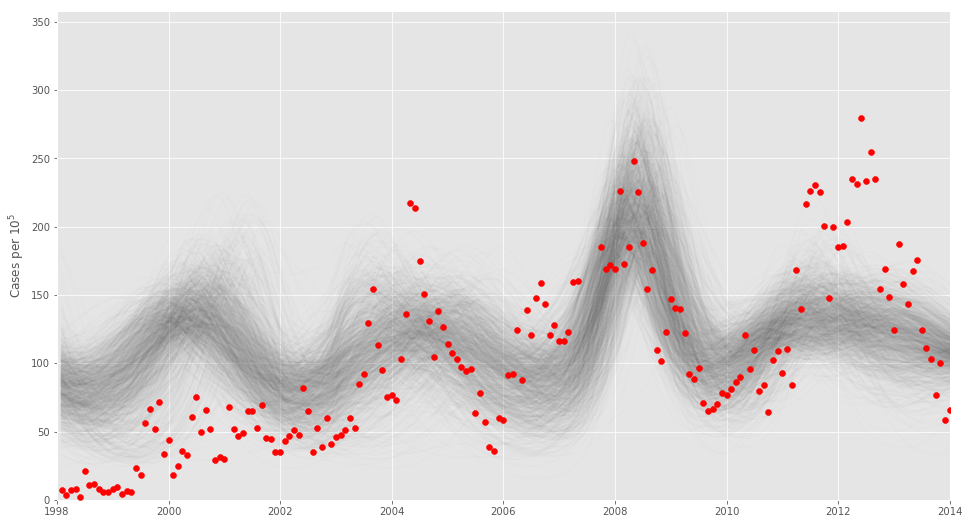

In [46]:
fig, axs = plt.subplots(1, figsize=(16, 9))
# axs = np.hstack(axs)
# labels = ['0-1', '1-21', '21+']
from_place = mle_place
# from_place = 0
for j in np.arange(-600,600):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.02)
ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

# Likelihood Analysis
See a chart of to lines for two models, with data scatterd

In [244]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=6)

## MLE Comparison

-19.5458591715 35842
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978]
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978]
[  3.9805           1.725391842174  60.               0.000772012353   0.000330903533   0.000055624978]
[ 1.725391842174  0.000772012353  0.000330903533  0.000055624978] -19.5458591715


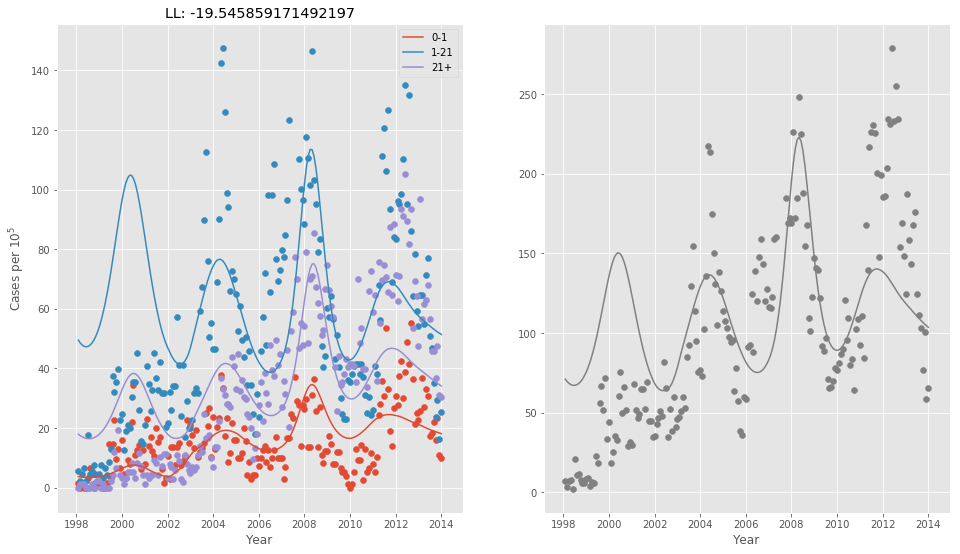

In [31]:
mle, mle_place, min_le = mle_values(mcmc, True)
print (mle, mle_place)
best_vals = mcmc['chain'][mle_place,:]
print (best_vals)

print (best_vals)
bvals = best_vals.copy() #3.9287725897700483
g = mcmc['initial_guess']
g[mcmc['active_params']] = best_vals
print (g)
sl150 = np.append(np.arange(112), np.arange(116,192))
# print(vals)
# zb, _ = run_model(mcmc['state_0'],mcmc['start'],mcmc['end'],*g)
zb = mcmc['y_hat_M'][mle_place-1,:,:]
print ((bvals), log_liklihood(zb, mcmc['datax'], mcmc['sigma']))
###### Draw Figure 4####
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(mcmc['datay'], zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(mcmc['datay'][mcmc['datax'][i,:]<150], mcmc['datax'][i, :][mcmc['datax'][i,:]<150])
ax.legend()
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datax'], mcmc['sigma'])))
ax = axs[1]
ax.plot(mcmc['datay'], zb.sum(axis=0), color='grey')
# ax.plot(mcmc['datay'], zc.sum(axis=0), color='grey', linestyle= '--')
ax.scatter(mcmc['datay'][sl150], mcmc['datax'].sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()

## Cloud old version

1718


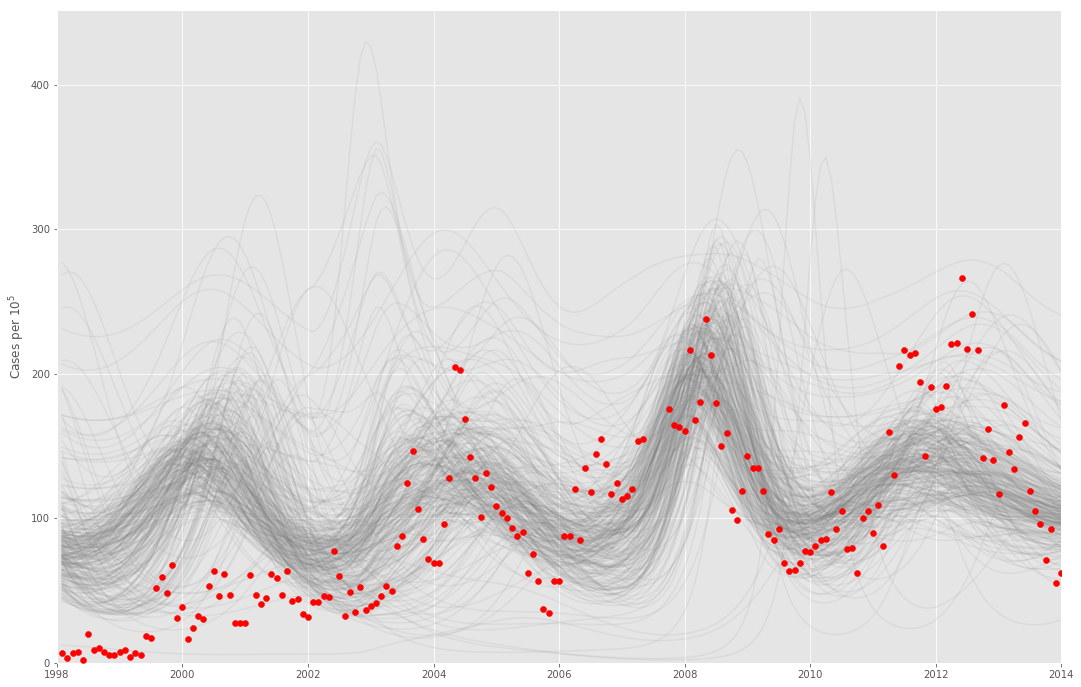

In [307]:
fig, axs = plt.subplots(1, figsize=(18, 12))
from_place = mle_place
print (from_place)
for j in np.arange(-1000,len(mcmc['chain']) - mle_place,5):
    chain_place = from_place + j
    curr_model = mcmc['y_hat_M'][chain_place,:,:]
    ax = axs
    ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.1)
ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
ax.set_xlim(1998,2014)
ax.set_ylim(bottom=0)
plt.show()

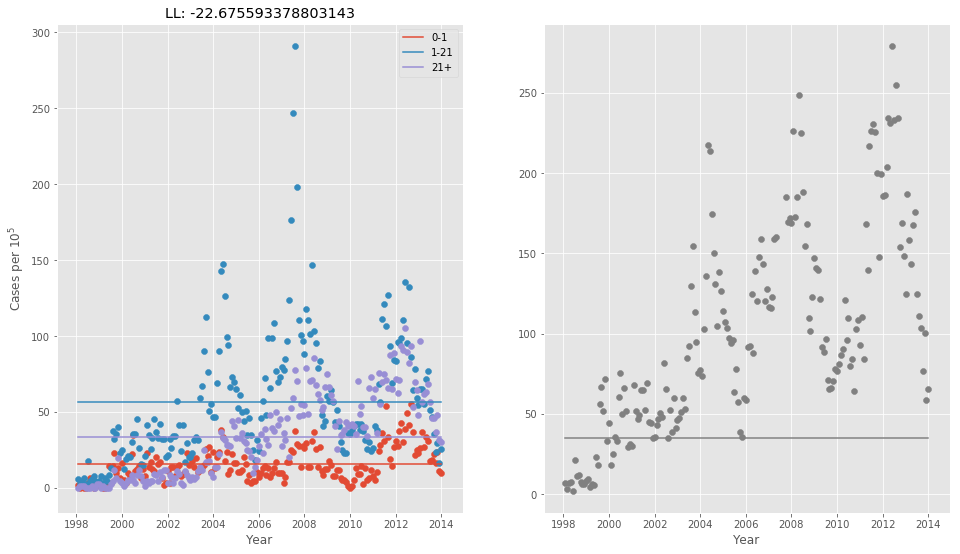

In [32]:
t1 = mcmc['datax'].mean(axis=1)
zb = np.repeat(t1, 192,axis=0).reshape(3,192)
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels = ['0-1', '1-21', '21+']
ax = axs[0]
for i, l in enumerate(labels):
    if i >=3:
        continue
    ax.plot(mcmc['datay'], zb[i, :], label=l, color='C{}'.format(i))
    ax.scatter(mcmc['datay'], mcmc['datax'][i, :])
ax.legend()
ax.set_title("LL: {}".format(log_liklihood(zb, mcmc['datax'], mcmc['sigma'])))
ax.set_ylabel("Cases per $10^5$")
ax.set_xlabel("Year")
ax = axs[1]
ax.plot(mcmc['datay'], zb.mean(axis=0), color='grey')
ax.scatter(mcmc['datay'][sl150], mcmc['datax'].sum(axis=0)[sl150], c='grey')
ax.set_ylim
ax.set_xlabel("Year")

plt.show()